<p align="center">
    <img src="./images/adsp_logo.png">
</p>

### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta


# Revision: Histogram, PDF, Numerical Integral

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/NLo0jU8CGDE" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Histogram and PDF Revision

### Signals

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/6FR7VhCIhbw" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa

In [4]:
# Signal Processing Parameters
Fs = 32000   # Sampling frequency
T=1/Fs       # Sampling Period
t = np.arange(Fs)*T # Time vector

In [5]:
# Sine Wave
A=1
freq=500
n_period=1
period=np.round((1/freq)*n_period*Fs).astype(int)
t = np.arange(Fs)*T # Time vector
sinewave = A*np.sin(2*np.pi*freq*t)

In [6]:
# Uniform Distribution Signal
uniform_signal = np.random.uniform(-1,1,t.size)

In [7]:
# Laplace Distribution Signal
mu, b = 0, 1 # mean and scale
laplace_signal = np.random.normal(mu, b, t.size)

In [8]:
# Music Signal
music_signal, sr = librosa.load('./audio/led-zeppelin-rock-and-roll.mp3', sr=32000, offset=10,duration=4)
music_signal/=np.abs(music_signal).max() # Normalization

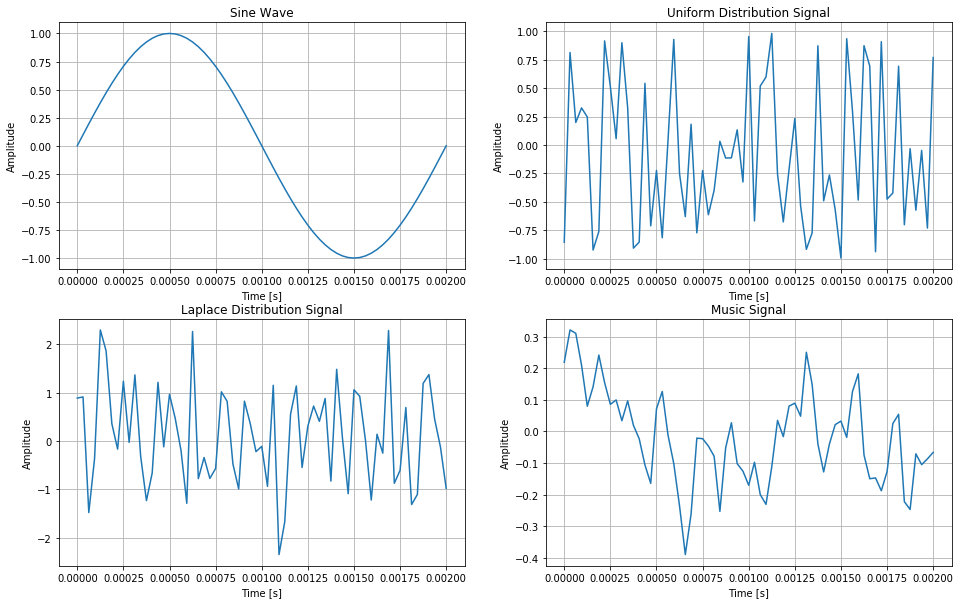

In [9]:
# Plot signals
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(t[:period+1], sinewave[:period+1])
plt.title('Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.subplot(222)
plt.plot(t[:period+1],uniform_signal[:period+1])
plt.grid()
plt.title('Uniform Distribution Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.subplot(223)
plt.plot(t[:period+1],laplace_signal[:period+1])
plt.grid()
plt.title('Laplace Distribution Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.subplot(224)
plt.plot(t[:period+1],music_signal[:period+1])
plt.grid()
plt.title('Music Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude');

In [10]:
# Listen to Signals
print('Sine Wave:')
display(ipd.Audio(sinewave,rate=Fs))
print('Uniform Distribution Signal')
display(ipd.Audio(uniform_signal,rate=Fs))
print('Laplace Distribution Signal')
display(ipd.Audio(laplace_signal,rate=Fs))
print('Music Signal')
display(ipd.Audio(music_signal,rate=Fs))

Sine Wave:


Uniform Distribution Signal


Laplace Distribution Signal


Music Signal


### Histograms

In [11]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/e19by3liCBY" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Definition of histogram**

: a representation of a frequency distribution by means of rectangles whose widths represent class intervals and whose areas are proportional to the corresponding frequencies.

<font size="1">
    From https://www.merriam-webster.com/dictionary/histogram
</font>

In [12]:
# Difine symbols and Functions
from sympy import symbols, Function
from sympy.stats import Uniform, Laplace
x  = symbols('x', real=True)
p_x = Function('p')(x)
U_x = Uniform('X',-1,1)
L_x = Laplace('X',0,1)

**Observe:** A histogram becomes a **probability distribution** $P(x)$  (with x a signal value), if we divide it by the total number of samples in it, such that its sum becomes 1.

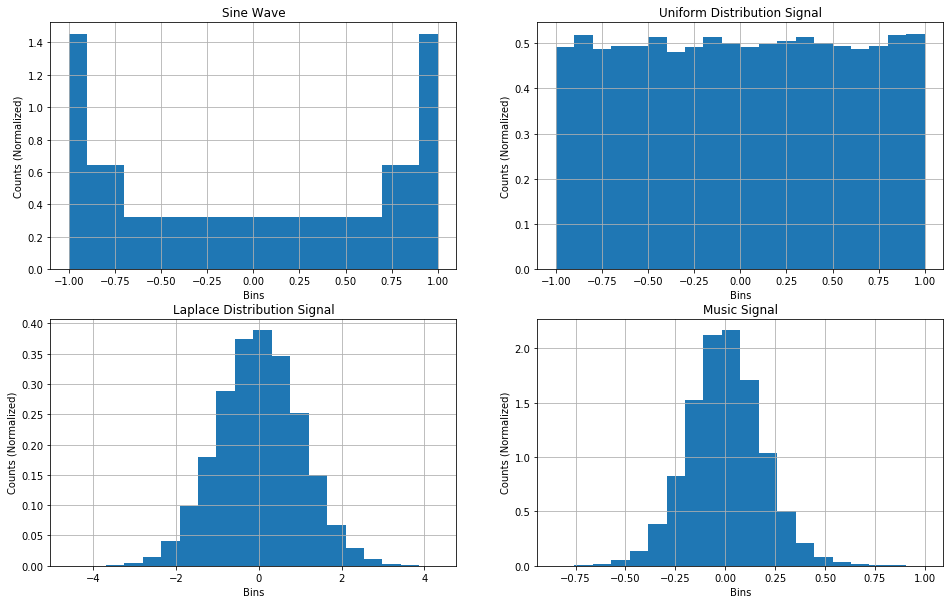

In [13]:
plt.figure(figsize=(16,10))
plt.subplot(221)
counts_sine, bins_sine, bin_edges_sine = plt.hist(sinewave[2:period], 20, density=True);
plt.grid()
plt.title('Sine Wave')
plt.xlabel('Bins')
plt.ylabel('Counts (Normalized)');
plt.subplot(222)
counts_uniform, bins_uniform, bin_edges_uniform=plt.hist(uniform_signal, 20, density=True);
plt.grid()
plt.title('Uniform Distribution Signal')
plt.xlabel('Bins')
plt.ylabel('Counts (Normalized)')
plt.subplot(223)
counts_laplace, bins_laplace, bin_edges_laplace = plt.hist(laplace_signal, 20, density=True);
plt.grid()
plt.title('Laplace Distribution Signal')
plt.xlabel('Bins')
plt.ylabel('Counts (Normalized)')
plt.subplot(224)
counts_music, bins_music, bin_edges_music=plt.hist(music_signal, 20, density=True);
plt.grid()
plt.title('Music Signal')
plt.xlabel('Bins')
plt.ylabel('Counts (Normalized)');

### Probability Density Functions (PDFs)

**Definition of Probability Density Function**

1: PROBABILITY FUNCTION<br>
2: a function of a continuous random variable whose integral over an interval gives the probability that its value will fall within the interval.<br>

<font size="1">
From https://www.merriam-webster.com/dictionary/probability%20density%20function
</font>

In [14]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/MVGkLGOYccg" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [15]:
# Imports 
from sympy import Function, Eq, symbols, Integral, simplify, pi, sqrt, lambdify, sin
from sympy.stats import Laplace, Uniform,  density
from sympy.plotting import plot

# Configurations
np.seterr(divide='ignore');

PDF: Sine wave:


1/(pi*sqrt(1 - x**2))

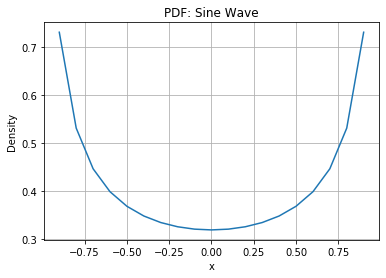

In [16]:
# Sine Wave
S_x_pdf = 1 / (pi*sqrt(1-x**2))
print('PDF: Sine wave:')
display(S_x_pdf)
pdf_sine=lambdify(x,S_x_pdf)
plt.figure()
plt.plot(np.arange(-1,1,0.1),pdf_sine(np.arange(-1,1,0.1)))
plt.grid()
plt.title('PDF: Sine Wave')
plt.ylabel('Density')
plt.xlabel('x');

PDF: Uniform Distribution (-1,1)


Piecewise((1/2, (x >= -1) & (x <= 1)), (0, True))

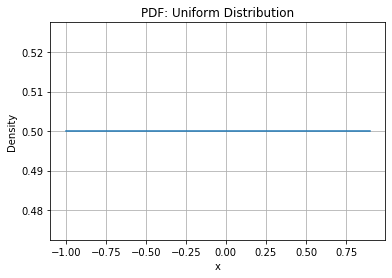

In [17]:
# Uniform
U_x_pdf = density(U_x)(x)
print('PDF: Uniform Distribution (-1,1)')
display(U_x_pdf)
pdf_uniform = lambdify(x,U_x_pdf)
plt.figure()
plt.plot(np.arange(-1,1,0.1),pdf_uniform(np.arange(-1,1,0.1)))
plt.grid()
plt.title('PDF: Uniform Distribution')
plt.ylabel('Density')
plt.xlabel('x');

PDF: Laplace Distribution  (mu=0,b=1)


exp(-Abs(x))/2

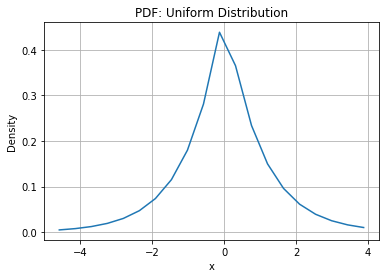

In [18]:
# Laplace
L_x_pdf = density(L_x)(x)
print('PDF: Laplace Distribution  (mu=0,b=1)')
display(L_x_pdf)
pdf_laplace=lambdify(x,L_x_pdf)
plt.figure()
x_axis=np.arange(bins_laplace[0],bins_laplace[-1],bins_laplace[1]-bins_laplace[0])
plt.plot(x_axis,pdf_laplace(x_axis))
plt.grid()
plt.title('PDF: Uniform Distribution')
plt.ylabel('Density')
plt.xlabel('x');

**Observe**: The PDF for the Music Signal has no closed form. 

**Example:** Let's calculate the probability that a value x is inside the intervals from -0.4 and -0.3 and from 0.8 to 0.9 in a Sine Wave.

In [19]:
# Integrating the PDF of a Sine Wave
p=Integral(S_x_pdf,(x,-0.4,-0.3))
display(p)
print('=')
display(round(p.doit().evalf(),3))

p=Integral(S_x_pdf,(x,0.8,0.9))
display(p)
print('=')
display(round(p.doit().evalf(),3))

Integral(1/(pi*sqrt(1 - x**2)), (x, -0.4, -0.3))

=


0.034

Integral(1/(pi*sqrt(1 - x**2)), (x, 0.8, 0.9))

=


0.061

In [20]:
# Looking at the Histogram (Normalized)
print('Histogram bins:', bins_sine[6:8])
print('Probability:', round((counts_sine[7]*np.diff(bins_sine[7:9]))[0],3))
print('Hisstogram bins:', bins_sine[-3:-1])
print('Probability:', round((counts_sine[-3]*np.diff(bins_sine[-3:-1]))[0],3))

Histogram bins: [-0.4 -0.3]
Probability: 0.032
Hisstogram bins: [0.8 0.9]
Probability: 0.065


## Numerical Integration Revision

Numerical integration is the approximate computation of an integral using numerical techniques.

<font size="1">
    From http://mathworld.wolfram.com/NumericalIntegration.html
</font


In [21]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/1mtBaBmOtRA" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Riemann Sum
<font size="2">
(From    https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/)
<font>

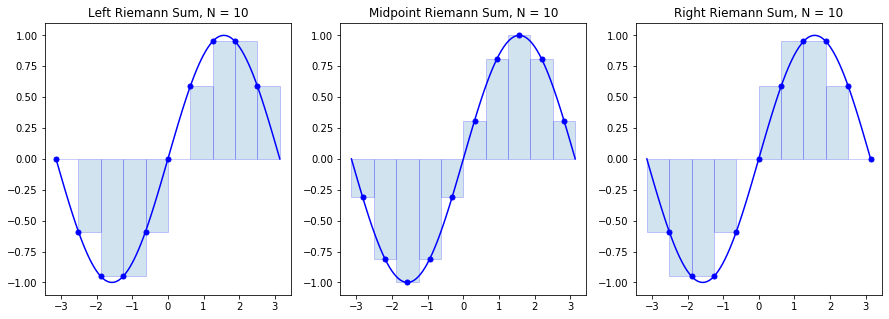

In [22]:
f = lambda x : np.sin(x)
a = -np.pi; b = +np.pi; N = 10
n = 10 # Use n*N+1 points to plot the function smoothly

x = np.linspace(a,b,N+1)
y = f(x)

X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(X,Y,'b')
x_left = x[:-1] # Left endpoints
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10)
plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Left Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,2)
plt.plot(X,Y,'b')
x_mid = (x[:-1] + x[1:])/2 # Midpoints
y_mid = f(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=10)
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
plt.title('Midpoint Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,3)
plt.plot(X,Y,'b')
x_right = x[1:] # Left endpoints
y_right = y[1:]
plt.plot(x_right,y_right,'b.',markersize=10)
plt.bar(x_right,y_right,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Right Riemann Sum, N = {}'.format(N));

In [23]:
# The integral of a sinusoidal from 0 to pi/2
t = symbols('t', real=True)
Eq(Integral(sin(t), (t,0,pi/2)),Integral(sin(t), (t,0,pi/2)).doit().evalf())

Eq(Integral(sin(t), (t, 0, pi/2)), 1.0)

In [24]:
# From https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/
def riemann_sum(f,a,b,N,method='midpoint'):
    '''Compute the Riemann sum of f(x) over the interval [a,b].

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a , b : numbers
        Endpoints of the interval [a,b]
    N : integer
        Number of subintervals of equal length in the partition of [a,b]
    method : string
        Determines the kind of Riemann sum:
        right : Riemann sum using right endpoints
        left : Riemann sum using left endpoints
        midpoint (default) : Riemann sum using midpoints

    Returns
    -------
    float
        Approximation of the integral given by the Riemann sum.
    '''
    dx = (b - a)/N
    x = np.linspace(a,b,N+1)

    if method == 'left':
        x_left = x[:-1]
        return np.sum(f(x_left)*dx)
    elif method == 'right':
        x_right = x[1:]
        return np.sum(f(x_right)*dx)
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:])/2
        return np.sum(f(x_mid)*dx)
    else:
        raise ValueError("Method must be 'left', 'right' or 'midpoint'.")

In [25]:
print('Riemman left:',riemann_sum(np.sin,0,np.pi/2,100,'left'))
print('Riemman midpoint:',riemann_sum(np.sin,0,np.pi/2,100,'midpoint'))
print('Riemman right:',riemann_sum(np.sin,0,np.pi/2,100,'right'))

Riemman left: 0.992125456605633
Riemman midpoint: 1.0000102809119054
Riemman right: 1.007833419873582


### Trapezoidal Rule
<font size="2">
(From https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/)
<font>


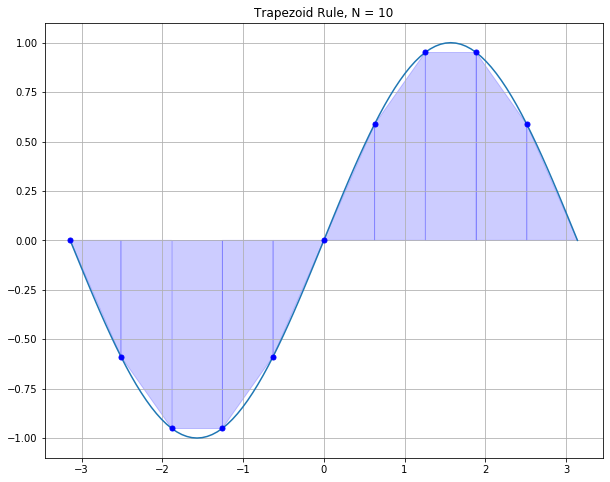

In [26]:
f = lambda x : np.sin(x)
a = -np.pi; b = +np.pi; N = 10
n = 10 # Use n*N+1 points to plot the function smoothly

x = np.linspace(a,b,N+1)
y = f(x)

X = np.linspace(a,b,n*N+1)
Y = f(X)
plt.figure(figsize=(10,8))
plt.plot(X,Y)
x_left = x[:-1] # Left endpoints
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10)
for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

plt.title('Trapezoid Rule, N = {}'.format(N))
plt.grid()

In [27]:
# From https://www.math.ubc.ca/~pwalls/math-python/integration/trapezoid-rule/
def trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,a=0,b=np.pi/2,N=1000)
    0.99999979438323316
    '''
    x = np.linspace(a,b,N+1)
    y = f(x)
    y_right = y[1:] # Right endpoints
    y_left = y[:-1] # Left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

In [28]:
print('Trapezoidal Rule:',trapz(np.sin,0,np.pi/2,100))

Trapezoidal Rule: 0.9999794382396074


#### MPMath and Scipy Numerical Integration

In [29]:
# MPMath (Sympy)
from mpmath import quad, sin

f = lambda x : sin(x)
quad(f, [0, np.pi/2])

mpf('0.99999999999999989')

In [30]:
# Scipy
import scipy.integrate
f = lambda x : np.sin(x)
print(scipy.integrate.quad(f, 0, np.pi/2))

(0.9999999999999999, 1.1102230246251564e-14)
